In [1]:
import sys
import os

# add project root to Python path
sys.path.append(os.path.abspath(".."))

from src.bs import bs_pricing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
S0 = 100
K = 105
r = 0
sigma = 0.2
t = 0
T = 2

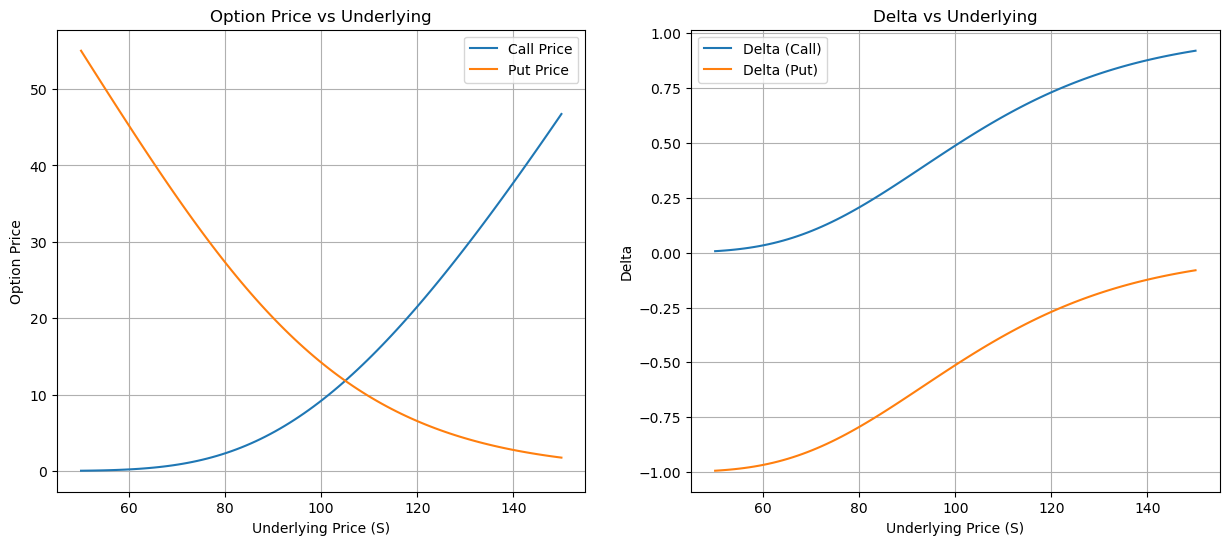

In [3]:
# OPTION PRICES VS UNDERLYING

S_values = np.linspace(50, 150, 100)

call_ = [bs_pricing(S, K, r, sigma, t, T, 'C')['price'] for S in S_values]
put_ = [bs_pricing(S, K, r, sigma, t, T, 'P')['price'] for S in S_values]

fig, ax = plt.subplots(1,2, figsize=(15, 6))

ax[0].plot(S_values, call_, label='Call Price')
ax[0].plot(S_values, put_, label='Put Price')
ax[0].set_xlabel('Underlying Price (S)')
ax[0].set_ylabel('Option Price')
ax[0].set_title('Option Price vs Underlying')
ax[0].legend()
ax[0].grid(True)

# DELTA VS UNDERLYING

delta_call_ = [bs_pricing(S, K, r, sigma, t, T, 'C')['delta'] for S in S_values]
delta_put_ = [bs_pricing(S, K, r, sigma, t, T, 'P')['delta'] for S in S_values]

ax[1].plot(S_values, delta_call_, label='Delta (Call)')
ax[1].plot(S_values, delta_put_, label='Delta (Put)')
ax[1].set_xlabel('Underlying Price (S)')
ax[1].set_ylabel('Delta')
ax[1].set_title('Delta vs Underlying')
ax[1].legend()
ax[1].grid(True)
plt.show()

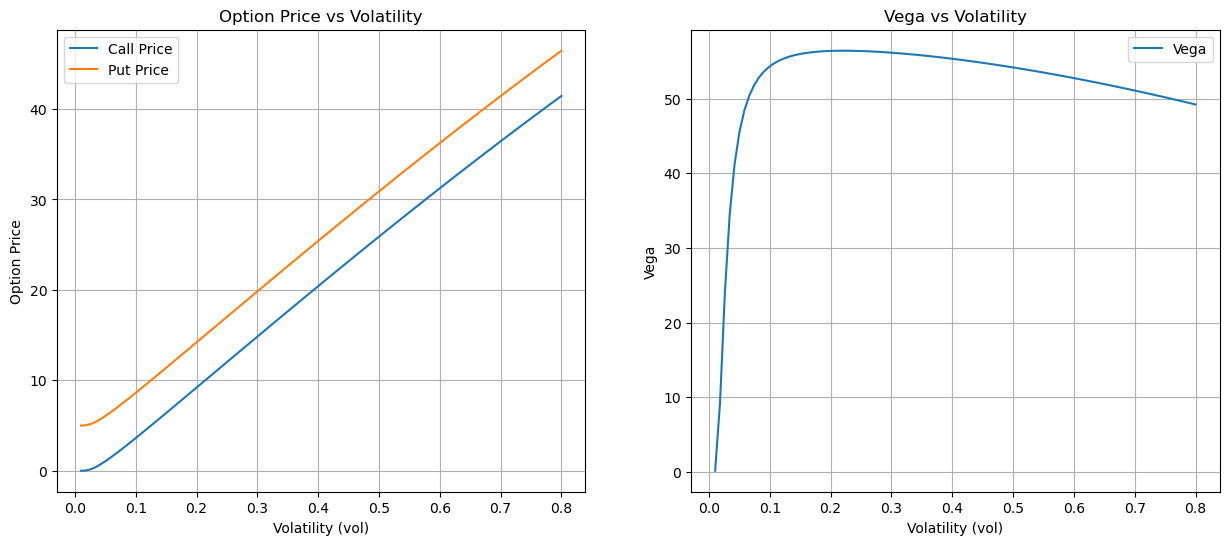

In [4]:
# OPTION PRICES VS VOLATILITY


sigma_values = np.linspace(0.01, 0.8, 100)

call_ = [bs_pricing(S0, K, r, sigma_, t, T, 'C')['price'] for sigma_ in sigma_values]
put_ = [bs_pricing(S0, K, r, sigma_, t, T, 'P')['price'] for sigma_ in sigma_values]

fig1, ax1 = plt.subplots(1,2, figsize=(15,6))

ax1[0].plot(sigma_values, call_, label='Call Price')
ax1[0].plot(sigma_values, put_, label='Put Price')
ax1[0].set_xlabel("Volatility (vol)")
ax1[0].set_ylabel("Option Price")
ax1[0].set_title("Option Price vs Volatility")
ax1[0].legend()
ax1[0].grid(True)

# VEGA VS VOLATILITY
vega_ = [bs_pricing(S0, K, r, sigma_, t, T, 'C')['vega'] for sigma_ in sigma_values]

ax1[1].plot(sigma_values, vega_, label='Vega')
ax1[1].set_xlabel('Volatility (vol)')
ax1[1].set_ylabel('Vega')
ax1[1].set_title("Vega vs Volatility")
ax1[1].legend()
ax1[1].grid(True)
plt.show()

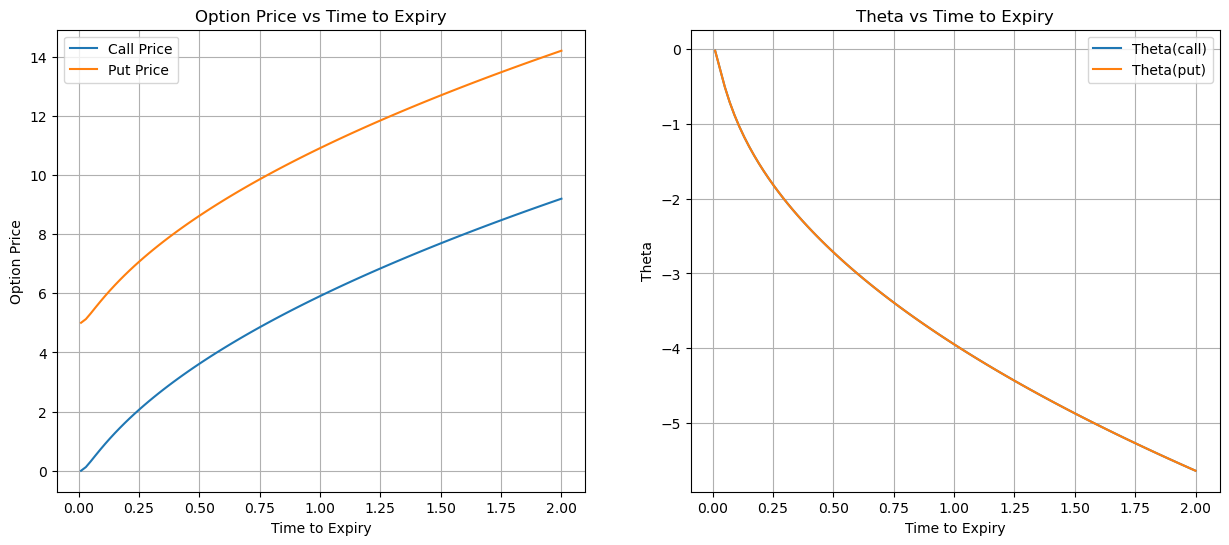

In [5]:
# OPTION PRICES VS TIME TO EXPIRY

t_values = np.linspace(0.01, 2.0, 100)

call_ = [bs_pricing(S0, K, r, sigma, t, T_, 'C')['price'] for T_ in t_values]
put_ = [bs_pricing(S0, K, r, sigma, t, T_, 'P')['price'] for T_ in t_values]

fig2, ax2 = plt.subplots(1,2, figsize=(15,6))

ax2[0].plot(t_values, call_, label='Call Price')
ax2[0].plot(t_values, put_, label='Put Price')
ax2[0].set_xlabel('Time to Expiry')
ax2[0].set_ylabel('Option Price')
ax2[0].set_title('Option Price vs Time to Expiry')
ax2[0].legend()
ax2[0].grid(True)

# THETA VS TIME TO EXPIRY
theta_call = [bs_pricing(S0, K, r, sigma, t, T_, 'C')['theta'] for T_ in t_values]
theta_put = [bs_pricing(S0, K, r, sigma, t, T_, 'P')['theta'] for T_ in t_values]

ax2[1].plot(t_values, theta_call, label='Theta(call)')
ax2[1].plot(t_values, theta_put, label='Theta(put)')
ax2[1].set_xlabel('Time to Expiry')
ax2[1].set_ylabel('Theta')
ax2[1].set_title('Theta vs Time to Expiry')
ax2[1].legend()
ax2[1].grid(True)
plt.show()